# Apparent Diffusion Coefficient Analysis

The `simulators` module from `iscat-lib` can be used to simulate hopping diffusion:

Simulation: 100%|████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 125205.57it/s]


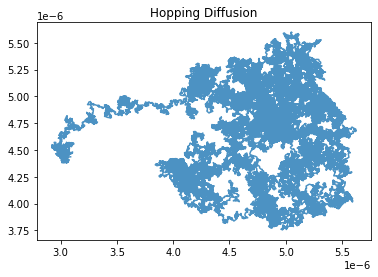

{'Df': 8e-13,
 'HL': 1e-06,
 'HP': 0.01,
 'L': 1e-05,
 'Tmax': 2.5,
 'dL': 2e-08,
 'dt': 5e-05,
 'seed': 42}


In [1]:
from iscat_lib import simulators

s = simulators.HoppingDiffusion(Tmax=2.5, dt=0.5e-4, HL=1e-6, seed=42)
s.run()
s.display_trajectory()
s.print_parameters()

The `Track`class can then be used to analyse the resulting trajectory.

In [2]:
from iscat_lib.analysis import Track

We create a new `Track` from the simulated trajectory.

In [3]:
track = Track.from_dict(s.trajectory)
track

<Track instance at 2354790903520>
------------------------
Track length:      50000
------------------------
MSD calculated:    False
MSD analysis done: False
SD analysis done:  False
ADC analysis done: False

A `Track` instance contains not only information about the trajectory but can also hold the MSD data and analysis results.

We demonstrate the analysis using `adc_analysis`. 

In [4]:
track.adc_analysis(numWorkers=8)

MSD calculation (workers: 8): 100%|████████████████████████████████████████████| 49997/49997 [00:06<00:00, 8329.84it/s]
C:\Users\John\Miniconda3\envs\iscat\lib\site-packages\scipy\optimize\minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


{'analyzed': True,
 'model': 'hop',
 'Dapp': array([1.20243823e-12, 9.59572275e-13, 8.97568160e-13, ...,
        4.05104257e-13, 4.02977112e-13, 3.97109014e-13]),
 'results': {'brownian': {'params': array([7.87903182e-13, 5.26679247e-09]),
   'bic': -48.82310498592707,
   'rel_likelihood': 1.0997474731389414},
  'confined': {'params': array([2.44917876e-17, 4.42525404e-09, 1.65513626e+01]),
   'bic': -46.87724844057917,
   'rel_likelihood': 2.909580335705768},
  'hop': {'params': array([ 7.65208683e-13, -2.56826186e-13,  7.29965601e-09,  8.58816833e-05]),
   'bic': -49.01326615307794,
   'rel_likelihood': 1.0},
  'n_points': 12499,
  'R': 0.16666666666666666}}

`adc_analysis` returns the analysis results but also saves them within in the `Track` instance. Since the MSD has to be calculated for ADC analysis, it is also stored. The corresponding fields are now set to `True`.

In [5]:
track

<Track instance at 2354790903520>
------------------------
Track length:      50000
------------------------
MSD calculated:     True
MSD analysis done: False
SD analysis done:  False
ADC analysis done:  True

We can take a closer look at the analysis results using the `get_adc_analysis_results` function. The returned `dict` contains the analysis results that were already returned above.

In [6]:
track.get_adc_analysis_results()

{'analyzed': True,
 'model': 'hop',
 'Dapp': array([1.20243823e-12, 9.59572275e-13, 8.97568160e-13, ...,
        4.05104257e-13, 4.02977112e-13, 3.97109014e-13]),
 'results': {'brownian': {'params': array([7.87903182e-13, 5.26679247e-09]),
   'bic': -48.82310498592707,
   'rel_likelihood': 1.0997474731389414},
  'confined': {'params': array([2.44917876e-17, 4.42525404e-09, 1.65513626e+01]),
   'bic': -46.87724844057917,
   'rel_likelihood': 2.909580335705768},
  'hop': {'params': array([ 7.65208683e-13, -2.56826186e-13,  7.29965601e-09,  8.58816833e-05]),
   'bic': -49.01326615307794,
   'rel_likelihood': 1.0},
  'n_points': 12499,
  'R': 0.16666666666666666}}

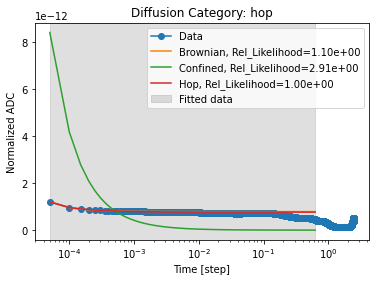

In [7]:
track.plot_adc_analysis_results()